<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/Charulata_chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

In [8]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()


To understand how the data structure looks like:




In [9]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
#for numerical variables:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
#for categorical variables:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Lets visulaize the entire dataset:


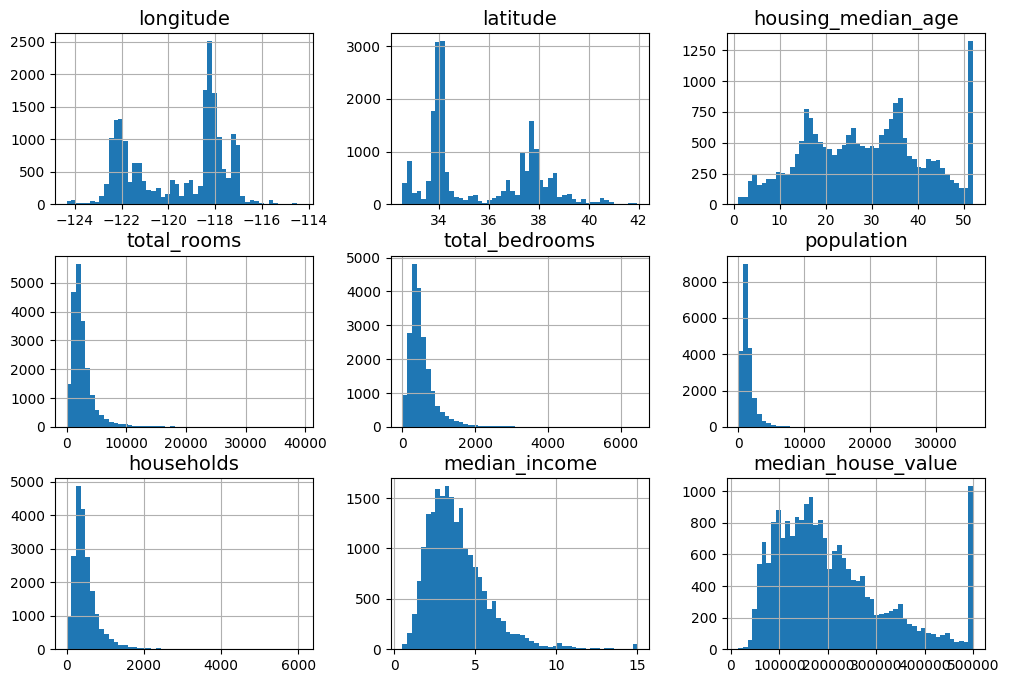

In [13]:
import matplotlib.pyplot as plt

#This is a hitogram for each numerical attribute:

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
plt.show()

Observations:
1. Many histograms are skewed right. This may make it a bit harder for some machine learning algorithms to detect patterns. Later, we will try transforming these attributes to have more symmetrical and bell-shaped distributions.
2. The median income attribute does not look like it is expressed in US dollars
(USD), it is actually capped at 15 (actually, 15.0001) for higher median
incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers
represent roughly tens of thousands of dollars (e.g., 3 actually means about
$30,000).
3. Housing median age and the median house value are also capped.

**Creating a test set: **

In [14]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [15]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)
#RangeIndex: 20640 entries, 0 to 20639

16512

In [16]:
len(test_set)

4128

In [17]:
#To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed:
np.random.seed(42)


**Advantages of Hash-Based Splitting:**
1. Reproducibility Across Different Runs:

Hash-based splitting ensures that the same data points consistently fall into the training and test sets across different runs, even if the data order changes.
In contrast, np.random.seed() ensures reproducibility **only if the order of data remains the same.** If the data order changes, the split will also change.

2. Consistency Across Different Systems:

Hash functions like crc32 produce the same output for the same input on any system, ensuring consistency across different environments.
np.random.seed() depends on the initial state of the random number generator, which might still lead to **slight variations across different systems or Python versions.**

3. Data Integrity:

When using a specific identifier (like an index or a combination of columns) for hashing, you can ensure that certain records always go to the same split, preserving data integrity.
This is particularly **useful for datasets with specific constraints, such as ensuring all data from the same user or session remain in the same split.**

4. Flexibility with Data Updates:

If your dataset is updated (e.g., more records are added),** hash-based splitting can easily accommodate the new records without disrupting the existing split.**
With np.random.seed(), adding new records might require recalculating the split, which could change the assignment of existing records.

5. Avoiding Randomness:

Hash-based splitting completely avoids the inherent randomness in the splitting process. This is beneficial when randomness needs to be minimized for specific applications.
np.random.seed() still introduces randomness; it's just controlled by the seed value.

---



**In short, While np.random.seed() is useful for controlling randomness in scenarios like shuffling data or generating random numbers, hash-based splitting provides a more robust and consistent method for splitting datasets, especially when dealing with updates, changes in data order, and ensuring reproducibility across different environments.**

---



**How Hash-Based Splitting Works:**

Identifier-Based Splitting:
By using an identifier (such as a unique ID, a combination of features, or an index), you ensure that the decision to include a record in the training or test set is deterministic.

The identifier is hashed, and the result is compared to the test ratio threshold to determine the split.

In [18]:
from zlib import crc32
from sklearn.model_selection import train_test_split


In [19]:
#is_id_in_test_set: This function determines if an identifier should be in the test set based on the provided test ratio. It uses the crc32 hash function to ensure consistent hashing.
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32


In [20]:
#split_data_with_id_hash: This function splits the dataset based on an identifier column and the test ratio. It applies the is_id_in_test_set function to each identifier.
def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [21]:
#the dataset housing is reset to have an index column, which is then used to split the dataset into training and test sets using the split_data_with_id_hash function.
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")


In [22]:
#a new identifier id is created by combining longitude and latitude, which is then used to split the dataset.
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")


In [23]:
 #train_test_split function from sklearn with a fixed random state to ensure reproducibility. The dataset housing is split into training and test sets with 20% of the data in the test set.
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [24]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-122.37,37.94,49.0,969.0,229.0,599.0,195.0,1.3167,71600.0,NEAR BAY
11964,-118.38,33.89,35.0,1778.0,330.0,732.0,312.0,6.5745,379300.0,<1H OCEAN
5390,-119.33,36.28,16.0,2624.0,527.0,1077.0,520.0,2.1250,104200.0,INLAND
860,-117.19,34.08,22.0,2467.0,555.0,1567.0,494.0,2.6536,84700.0,INLAND


In [25]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,65600.0,INLAND
3024,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308,353400.0,<1H OCEAN
15663,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925,466700.0,NEAR OCEAN
20484,-118.44,34.05,18.0,4780.0,1192.0,1886.0,1036.0,4.4674,500001.0,<1H OCEAN
9814,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750,286100.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-121.92,40.52,13.0,4581.0,881.0,1799.0,734.0,2.2993,99500.0,INLAND
16623,-122.08,37.68,26.0,2607.0,682.0,1401.0,607.0,2.6563,184100.0,NEAR BAY
18086,-119.00,35.39,42.0,2839.0,516.0,1203.0,487.0,3.7708,79400.0,INLAND
2144,-117.92,33.63,39.0,1469.0,226.0,553.0,225.0,7.8496,490800.0,<1H OCEAN


Now, we are going to perform **Stratified sampling** , which ensures that the training and test sets have a similar distribution of categories, which is important for preserving the representativeness of the data.

We should apply stratified sampling during the dataset splitting process. This way, we can directly ensure that the stratification is respected in both the training and test sets.


---


**Why Stratified Sampling is Important:**

**Preserve Category Distribution**:

Ensures that the distribution of categories (e.g., income levels, classes) in the training and test sets reflects the distribution in the original dataset.
This is crucial for imbalanced datasets where some categories are underrepresented.

**Improve Model Performance:**

Helps in training more representative models because the training data accurately reflects the full dataset.
Ensures that the test set provides a fair evaluation of the model's performance.



In [26]:
#Creating Income Categories:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


The pd.cut function is used to segment and sort the median_income column of the housing DataFrame into discrete intervals (bins).

The bins parameter specifies the bin edges, creating the following categories:

0 to 1.5

1.5 to 3.0

3.0 to 4.5

4.5 to 6.0

Greater than 6.0

The labels parameter assigns labels (1, 2, 3, 4, 5) to these bins.

The new column income_cat is added to the DataFrame with these categorical values.

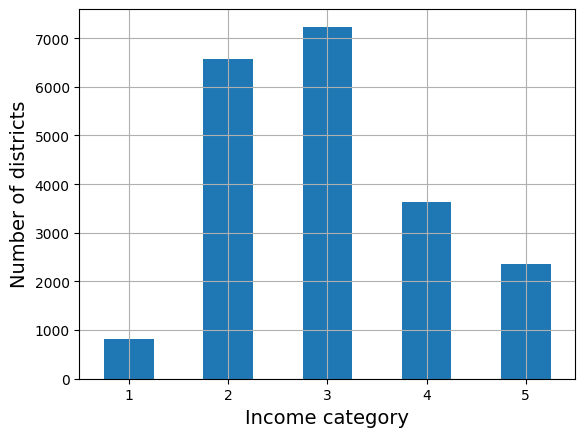

In [27]:
#Plotting the Income Categories:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")

plt.show()


In [30]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42
)



In [31]:
# Verify the stratification
print(strat_train_set["income_cat"].value_counts() / len(strat_train_set))
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))


income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64
income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


The **income_cat column** was created specifically for the purpose of stratified sampling. It helped ensure that the training and test sets had the same distribution of income categories as the original dataset.

 After performing the stratified split, the income_cat column is no longer needed for modeling and analysis. Dropping it cleans up the dataset, removing unnecessary columns that were only used temporarily.

In [32]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

***Discover and Visualize the Data to Gain Insights***


In [33]:
#This line will create a copy of the stratified training set (strat_train_set) and assign it to the variable housing.
#This is done to preserve the original training set while working with the copy.
housing = strat_train_set.copy()


**Visualizing Geographical Data**

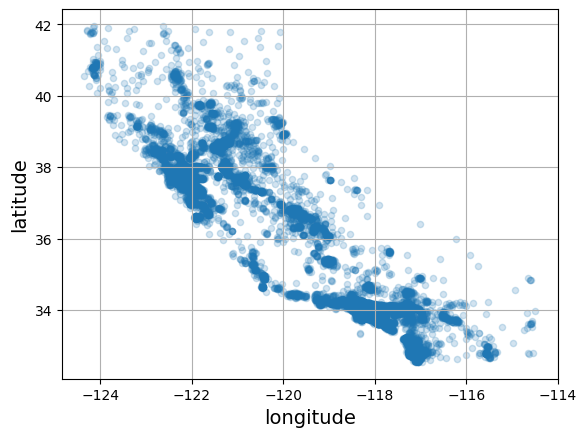

In [36]:
#Because the dataset includes geographical information (latitude and longitude), it is a good idea to create a scatterplot of all the districts to visualize the data
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)

plt.show()

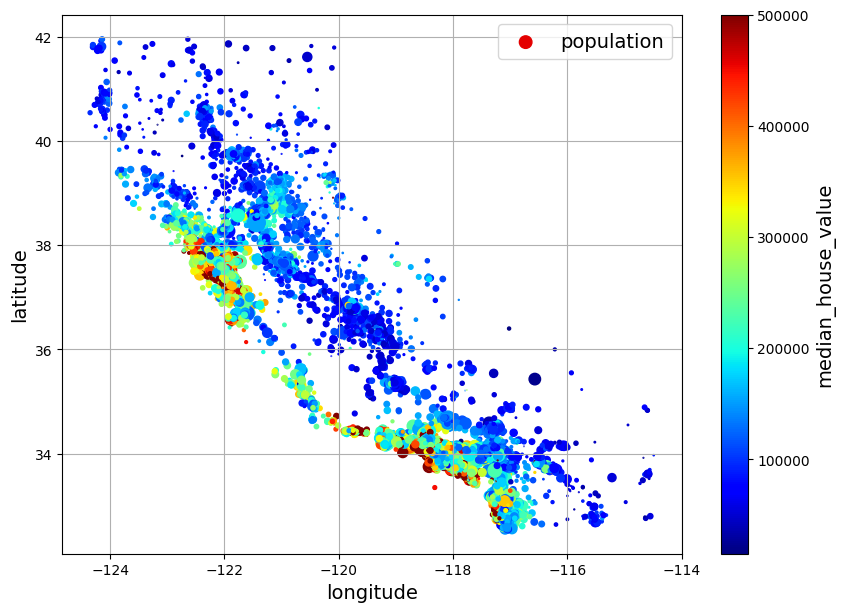

In [37]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

plt.show()

We are looking at the housing prices right now. The radius of each circle represents the district’s population, and the color represents the price. Here we have used a predefined color map (option cmap) called jet, which ranges from
blue (low values) to red (high prices)


---


So, the housing prices are very much related to the location
(e.g., close to the ocean) and to the population density.


A clustering algorithm should be useful for detecting the main cluster and for adding new features that measure the proximity to the cluster centers.

---

A clustering algorithm is a type of unsupervised machine learning algorithm that groups a set of objects in such a way that objects in the same group (called a cluster) are more similar to each other than to those in other groups (clusters). Clustering is used for a variety of applications, including data analysis, pattern recognition, and image processing.

Types of clustering algorithm:
1. K-Means Clustering
2. Hierarchical Clustering
3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

**What help will be a clustering algorithm do here for us?**

*Detecting Key Areas:*

Clusters of High/Low Prices: Identify areas with high or low median house values.
Population Clusters: Find densely populated areas.
Feature Engineering:

*Proximity to Clusters:* Create new features measuring the distance of a data point to the nearest cluster center, which can be useful for predictive modeling.




In [40]:
#Since the dataset is not too large, you can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the corr() method:
corr_matrix = housing.corr(numeric_only=True)

In [39]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1.

When it is close to 1, it means that
there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up.

When the coefficient is close to –1, it means
that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency
to go down when you go north).

Coefficients close to 0 mean that there is no
linear correlation.

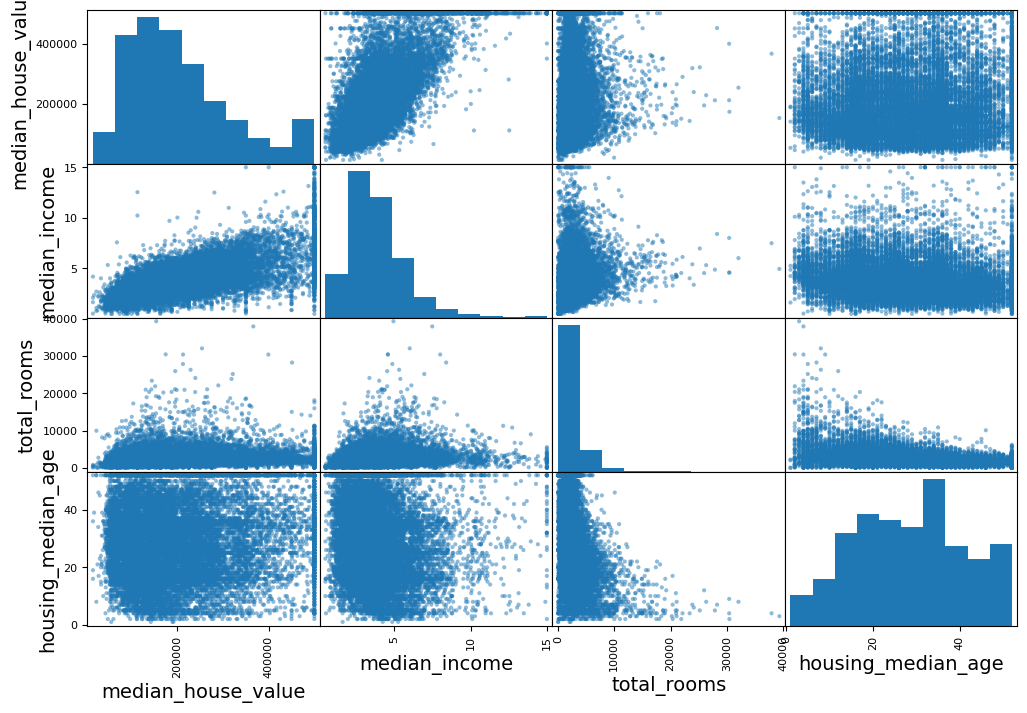

In [42]:
#This scatter matrix plots every numerical attribute against every other numerical attribute, plus a histogram of each numerical attribute’s values on the main diagonal (top left to bottom right)
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

plt.show()

**Off-Diagonal Subplots (Scatter Plots):**

**median_house_value vs median_income:** There is a clear positive correlation, indicating that higher median incomes are associated with higher median house values.

**median_house_value vs total_rooms:** There is a weaker positive correlation, suggesting that more rooms generally correlate with higher house values, but this relationship is not as strong as the one with income.

**median_house_value vs housing_median_age:** There is no clear correlation visible between the house values and the age of the houses.

The spread is quite even, showing that house value is relatively independent of house age in this dataset.

**median_income vs total_rooms:** There is a weak positive correlation, indicating that higher income areas tend to have houses with more rooms.

**median_income vs housing_median_age:** There is a slight indication that older houses are associated with lower median incomes, but this trend is not very strong.

**total_rooms vs housing_median_age**: There is no clear relationship visible between the total number of rooms and the age of the houses.

**Diagonal Subplots (Histograms):**

**median_house_value:** The histogram shows that most houses have median values below $300,000, with a noticeable peak around $100,000-$200,000.

**median_income:** The distribution of median income is right-skewed, with most values between 2 and 8.

**total_rooms:** The total number of rooms varies widely, with a concentration of values below 10,000.

**housing_median_age:** The distribution of housing median age shows that most houses are around 20-30 years old, with fewer very old or very new houses.



---

**Key Insights:**

**Strongest Correlation:** The strongest relationship observed is between median_house_value and median_income, highlighting the importance of income in determining house prices.

**Weak Correlations:** Relationships between house value and total rooms or house age are weaker, suggesting that other variables might be more influential.

**Distributions**: The individual distributions show typical patterns, such as the skewed income distribution and the concentration of house ages around 20-30 years.


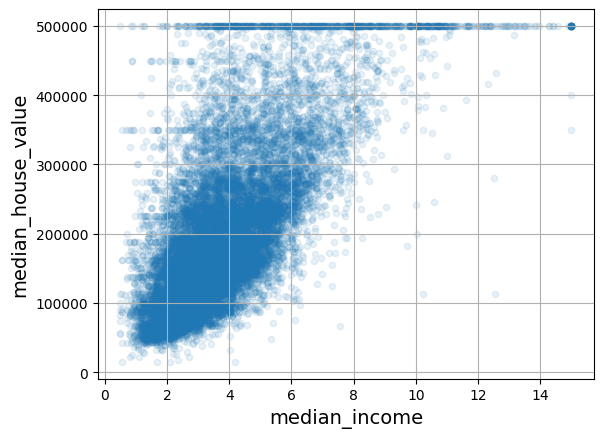

In [44]:
#Looking at the correlation scatterplots, it seems like the most promising attribute to predict the median house value is the median income, so let us zoom in on their scatterplot:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)

plt.show()

1. The correlation is indeed quite strong; you can clearly see the upward trend, and the points are not too dispersed.

2. The price cap is clearly visible as a horizontal line at $500,000.

3. The plot also reveals other less obvious straight lines a horizontal line
around 450,000 ,  350,000, perhaps one around $280,000, and a few more below that.

We can try removing the corresponding districts to prevent my algorithm
from learning to reproduce these data quirks.

# Experimenting with Attribute Combinations

Attribute combinations are important in data analysis and machine learning because they can reveal relationships and patterns that are not apparent when looking at individual attributes alone. By creating new features from existing ones, you can often improve the performance of your models and gain deeper insights into the data.

In [45]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [46]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

Summary of Findings:

Strongest Correlation: median_income (0.688380) remains the strongest predictor of median_house_value.

New Features:
rooms_per_house (0.143663) shows a meaningful relationship with house value.

bedrooms_ratio (-0.256397) shows a notable negative correlation, indicating that higher ratios might be associated with lower house values.

Weak Predictors: Some features, like population and people_per_house, have very low or negative correlations, suggesting they might not be useful predictors on their own.

# Prepare the Data for Machine Learning Algorithms

1. We will create a dataset (housing) that contains all the features except the
target variable (median_house_value).

2. We will create a separate Series (housing_labels) that contains only the target variable (median_house_value).





In [47]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

**Why This is Important:**

Feature and Target Separation:

Machine Learning Models: When training machine learning models, it is essential to separate the input features (used for making predictions) from the target variable (the value to be predicted). This ensures that the model does not inadvertently learn from the target values directly, which would lead to overfitting.

Data Integrity:

Creating Copies: Using the copy() method ensures that any modifications to housing_labels do not affect the original strat_train_set. This is important for maintaining data integrity and ensuring reproducibility of the analysis.

In [48]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


In [49]:
housing_labels

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
           ...   
14207    500001.0
13105     88800.0
19301    148800.0
19121    500001.0
19888    233300.0
Name: median_house_value, Length: 16512, dtype: float64